In [65]:
%pylab inline

import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [74]:
two_cities = pd.read_csv("Two Cities experiment-table.csv", header=6).rename(index=str, columns={'[[count infected] ls:of model] of turtle 0': 'origin-infected', '[[count infected] ls:of model] of turtle 1': 'other-infected'})

In [159]:
one_city = pd.read_csv("Network Disease rahmandad-table.csv", header=6).rename(index=str, columns={'count infected': 'origin-infected'})
one_city

,[run number],initial-infected,infected-inf-rate,infected-contact-rate,avg-incubation,exposed-contact-rate,avg-illness-duration,half-degree,population,exposed-inf-rate,run-de,run-abm,generate-network,[step],count susceptible,count exposed,origin-infected,count removed
0,7,1,0.06,1.25,15,4,15,5,200,0.05,True,True,"""nw:generate-watts-strogatz turtles links popu...",0,199,0,1,0
1,2,1,0.06,1.25,15,4,15,5,200,0.05,True,True,"""nw:generate-watts-strogatz turtles links popu...",0,199,0,1,0
2,5,1,0.06,1.25,15,4,15,5,200,0.05,True,True,"""nw:generate-watts-strogatz turtles links popu...",0,199,0,1,0
3,4,1,0.06,1.25,15,4,15,5,200,0.05,True,True,"""nw:generate-watts-strogatz turtles links popu...",0,199,0,1,0
4,3,1,0.06,1.25,15,4,15,5,200,0.05,True,True,"""nw:generate-watts-strogatz turtles links popu...",0,199,0,1,0
5,8,1,0.06,1.25,15,4,15,5,200,0.05,True,True,"""nw:generate-watts-strogatz turtles links popu...",0,199,0,1,0
6,1,1,0.06,1.25,15,4,15,5,200,0.05,True,True,"""nw:generate-watts-strogatz turtles links popu...",0,199,0,1,0
7,7,1,0.06,1.25,15,4,15,5,200,0.05,True,True,"""nw:generate-watts-strogatz turtles links popu...",1,199,0,1,0
8,2,1,0.06,1.25,15,4,15,5,200,0.05,True,True,"""nw:generate-watts-strogatz turtles links popu...",1,199,0,1,0
9,5,1,0.06,1.25,15,4,15,5,200,0.05,True,True,"""nw:generate-watts-strogatz turtles links popu...",1,199,0,0,1


In [146]:
sw_origin = two_cities[(two_cities['rewire-prob-city-1'] == 0.050000000000000003)]
ring_origin = two_cities[(two_cities['rewire-prob-city-1'] == 0.0)]

In [163]:
def ts_quantiles(data, quantiles = [0.5, 0.75, 0.95]):
    organized = data.pivot('[step]','[run number]')['origin-infected'].fillna(0).transpose()
    plot(organized.mean(), color = 'black', label='mean')
    plot(organized.median(), color = 'grey', label='median')
    for i, q in reversed(list(enumerate(sorted(quantiles)))):
        c = str(1 - i / len(quantiles))
        fill_between(organized.keys(), organized.quantile(0.5 - q / 2.), organized.quantile(0.5 + q / 2.), facecolor=c, edgecolor=c, label=str(round(q * 100)) + '%')
    legend()
    
    

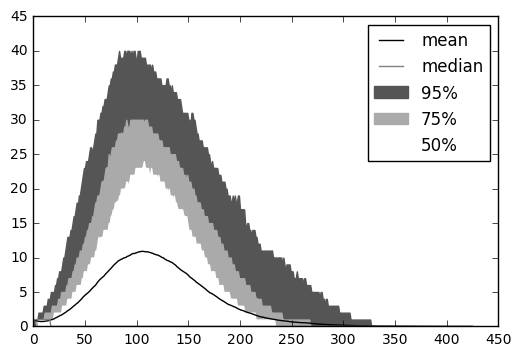

In [164]:
ts_quantiles(one_city)

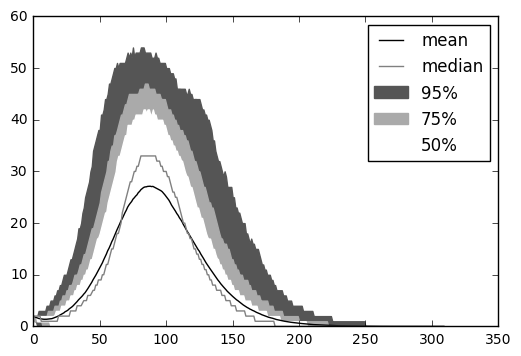

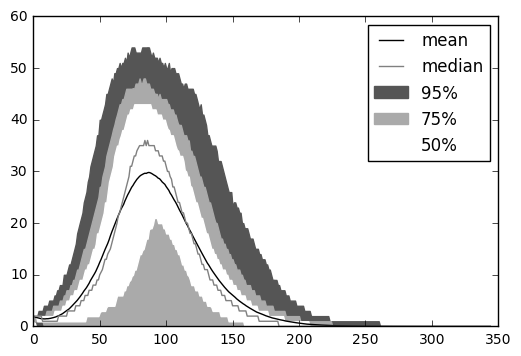

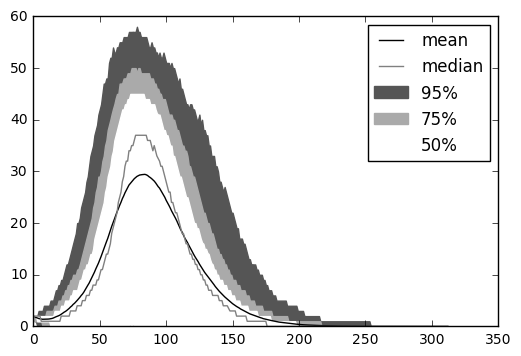

In [165]:
for rp in sorted(set(two_cities['rewire-prob-city-2'])):
    ts_quantiles(ring_origin[ring_origin['rewire-prob-city-2'] == rp])
    figure()

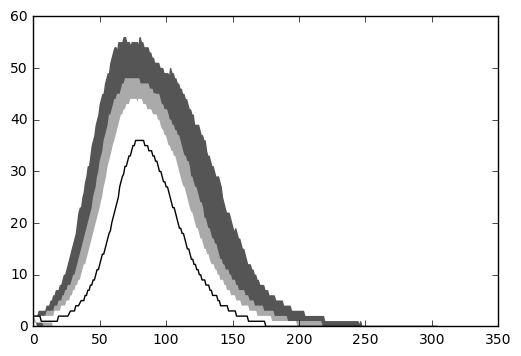

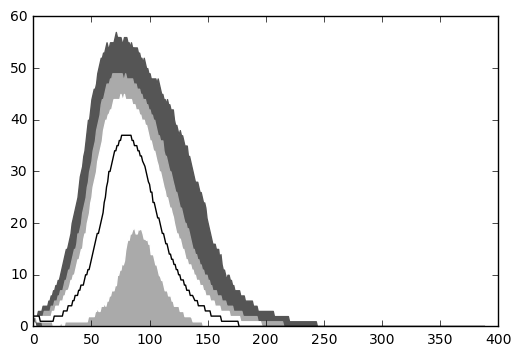

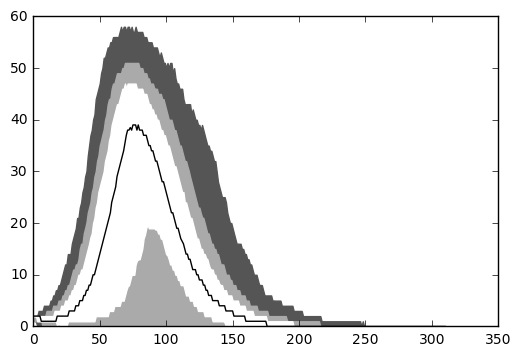

In [148]:
for rp in sorted(set(two_cities['rewire-prob-city-2'])):
    ts_quantiles(sw_origin[sw_origin['rewire-prob-city-2'] == rp])
    figure()